In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
na_vals = ["NA", "Na", "NaN", "Missing"]
df = pd.read_csv("general_data.csv", na_values = na_vals, index_col = "EmployeeID")
df_schema = pd.read_excel("data_dictionary.xlsx", sheet_name=0, index_col = "Variable")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
df.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,3.0,Y,11,8,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,Female,2,...,1.0,Y,16,8,1,NaN,2,1,0,0
3911,41,No,Non-Travel,Sales,2,2,Medical,1,Male,2,...,NaN,Y,14,8,2,10.0,5,3,1,2
4227,36,No,Travel_Rarely,Research & Development,2,3,Life Sciences,1,Male,2,...,NaN,Y,17,8,0,5.0,2,1,0,0


In [6]:
df.dropna(columns = ["EmployeeCount"], inplace=True)

TypeError: dropna() got an unexpected keyword argument 'columns'

In [8]:
attritioned = df["Attrition"] == "Yes"
df_left = df[attritioned]

In [ ]:
df_left.median()

In [ ]:
df_stay = df[df["Attrition"] == "No"]
df_stay.median()

In [ ]:
df_compare = pd.concat([df_stay.median(), df_left.median()], axis="columns") 
df_compare.rename(columns ={0: "StayedMedian", 1: "LeftMedian"})

## **Hypothesis 1:**
The median monthly income of the people who left is lower than the rest, i.e. it's less than 49300.0 units

Ho:µ <= 49300.0

Ha:µ > 49300.0

Hence we will be using right test statistic

Using a sample of 70 employees who left

In [ ]:
print(df_left.head(70)["MonthlyIncome"].median())
df_left.head(70)["MonthlyIncome"].std()

## Hypothesis 2:
The employees who left may have not like the current manager and the median of years spent with the him/her less than 3 years

Ho:µ <= 3

Ha:µ > 3

Hence we will be using right test statistic

Using a sample of 70 employees who left

In [9]:
print(df_left.head(70)["YearsWithCurrManager"].median())
df_left.head(70)["YearsWithCurrManager"].std()

2.0


2.7437487767462385

## Hypothesis 3:
Stayed employees have a median age 36, hence they may have tend to settle in instead of leaving the job

Ho:µ = 36
Ha:µ != 36
Hence we will be using Two tail test statistic

Using a sample of 70 employees who left

In [13]:
print(df_left.head(70)["Age"].median())
df_left.head(70)["Age"].std()

30.0


10.187070114391476

## Hypothesis 4:
Median total number of years spent at the company by the people who stayed isn't less than 5 years, hence they have seemed to become loyal to their job

Ho:µ >= 5
Ha:µ < 5
Hence we will be using left test statistic

Using a sample of 70 employees who left

In [14]:
print(df_left.head(70)["YearsAtCompany"].median())
df_left.head(70)["YearsAtCompany"].std()

3.0


4.741102596467171

## Hypothesis 5:
Median of total working years of employees who left was lest than the median of who stayed i.e 10 years, due to which they could have been fired due to lack of experience/skills

Ho:µ <= 10
Ha:µ > 10
Hence we will be using right test statistic

Using a sample of 70 employees who left

In [15]:
print(df_left.head(70)["TotalWorkingYears"].median())
df_left.head(70)["TotalWorkingYears"].std()

6.0


6.399162082829191

In [16]:
df_dep_pct = pd.concat([df["Department"].value_counts(), df_left["Department"].value_counts()], axis="columns")
df_dep_pct.columns = ["TotalNumber", "NumberLeft"]
df_dep_pct["Percentage_left"] = df_dep_pct["NumberLeft"]/df_dep_pct["TotalNumber"] * 100
df_dep_pct

,TotalNumber,NumberLeft,Percentage_left
Research & Development,2883,453,15.712799
Sales,1338,201,15.022422
Human Resources,189,57,30.158730


## Hypothesis 6:
Percentage of employees leaving from HR department is not less than 30%

Ho:µ >= 30
Ha:µ > 30
Hence we will be using left test statistic

## Hypothesis 7:
Number of employees that have left in Research & Development department is 201

Ho:µ == 201
Ha:µ != 201
Hence we will be using two tail test statistic

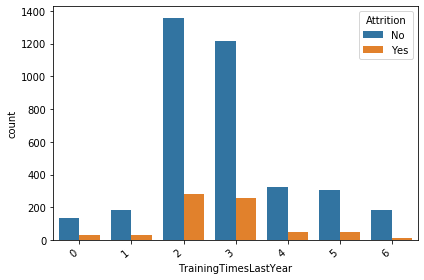

In [17]:
ax = sns.countplot(x="TrainingTimesLastYear", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Hypothesis 8:
Employees who had trained 2 times last year have left the most than the rest

Ho:µ == 201
Ha:µ != 201
Hence we will be using two tail test statistic

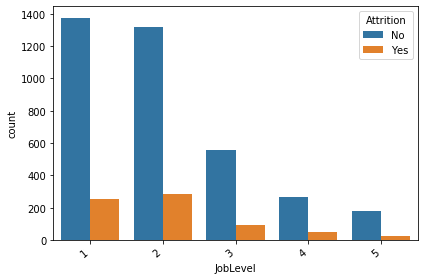

In [18]:
ax = sns.countplot(x="JobLevel", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Hypothesis 9:
Number of employees who left and had a job level of three or more won't be more than 180

Ho:µ <= 180
Ha:µ > 180
Hence we will be using right tail test statistic

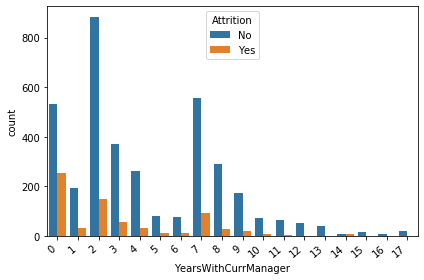

In [22]:
ax = sns.countplot(x="YearsWithCurrManager", hue="Attrition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Hypothesis 10:
Number of employees left on the zeroth year with the current manager isn't less than 200

Ho:µ >= 180
Ha:µ < 180
Hence we will be using left tail test statistic